<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

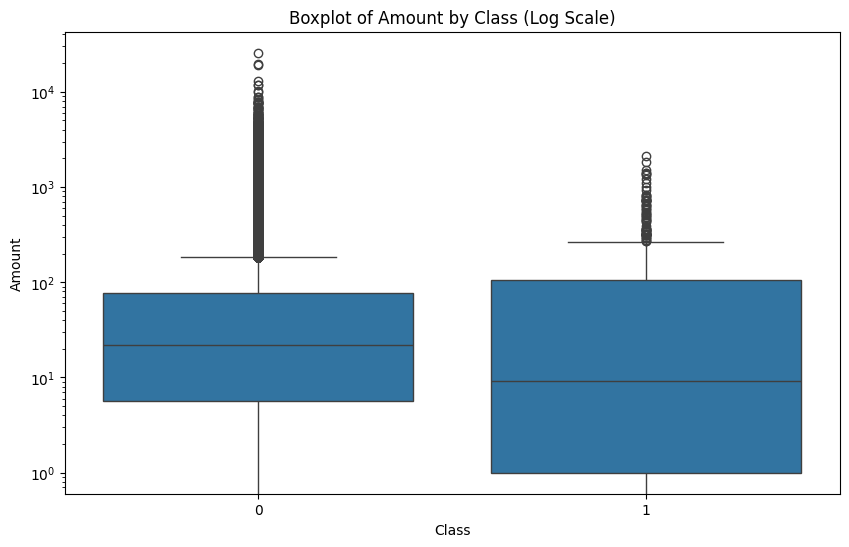

Median Amount for Non-Fraudulent Transactions: 22.0
Median Amount for Fraudulent Transactions: 9.25
Mean Amount for Non-Fraudulent Transactions: 88.29102242231328
Mean Amount for Fraudulent Transactions: 122.21132113821139


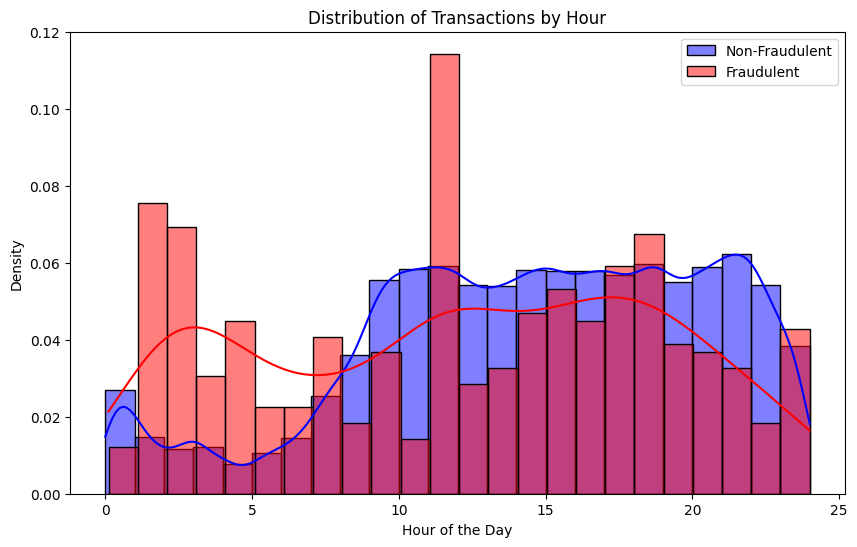

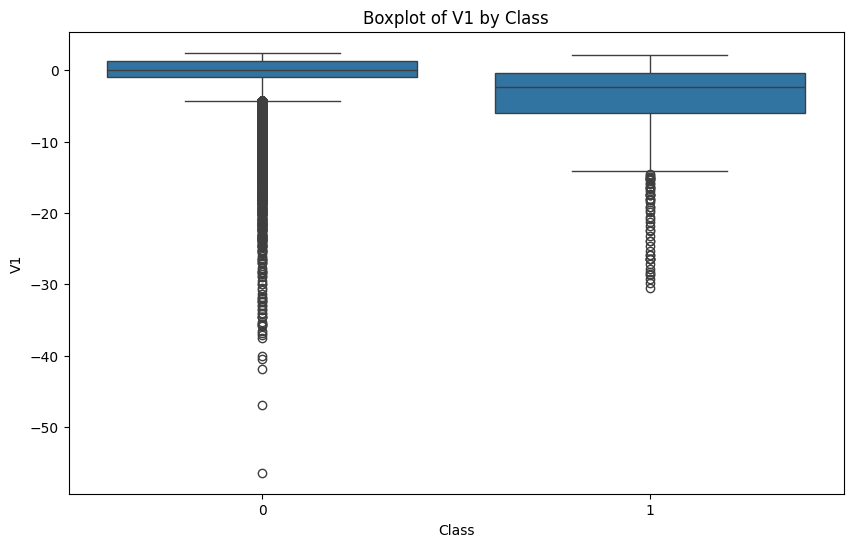

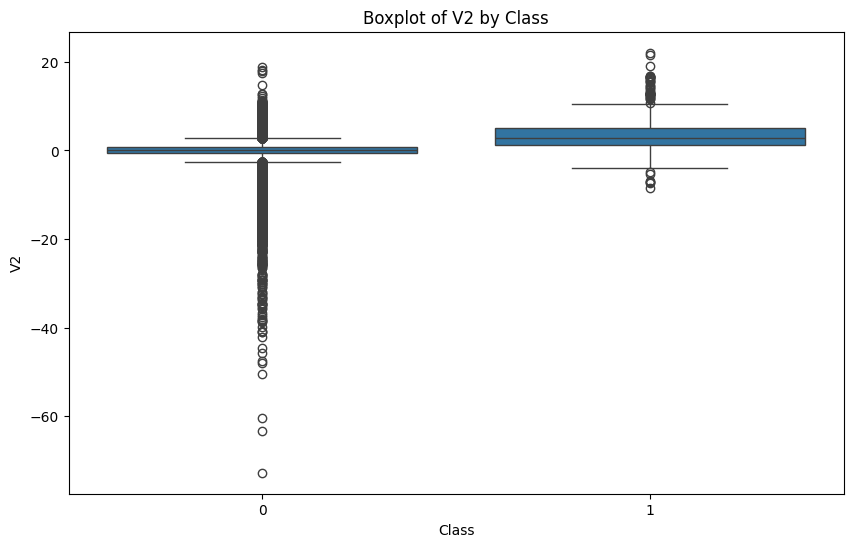

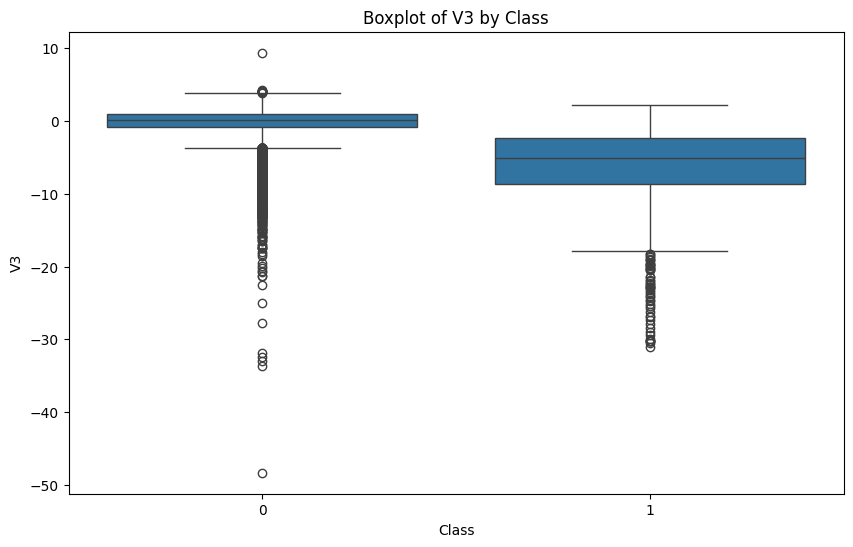

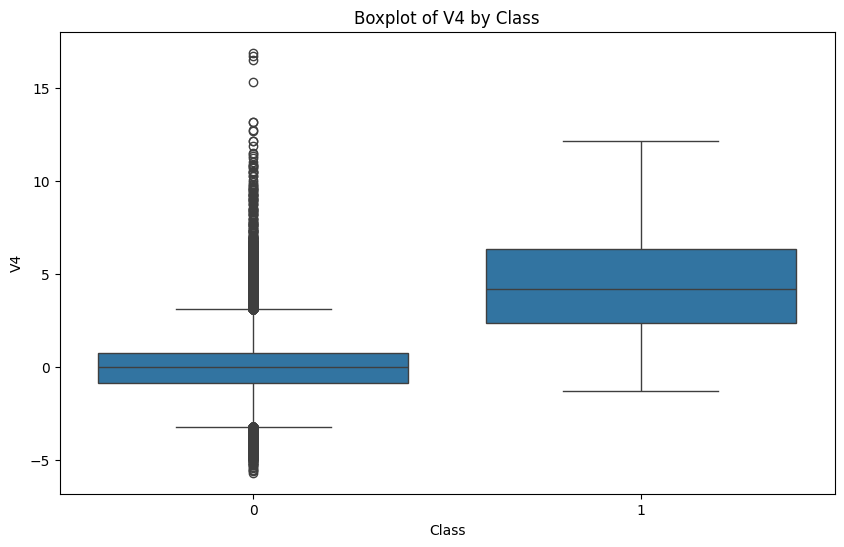

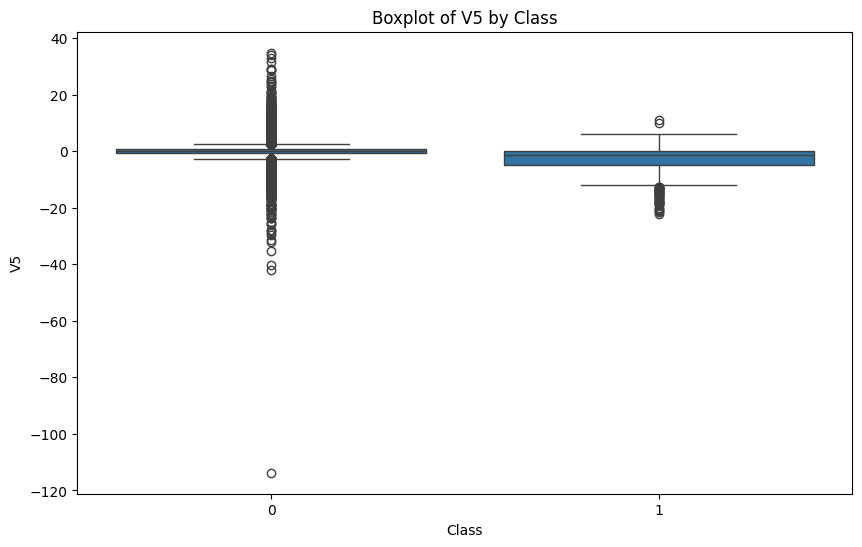

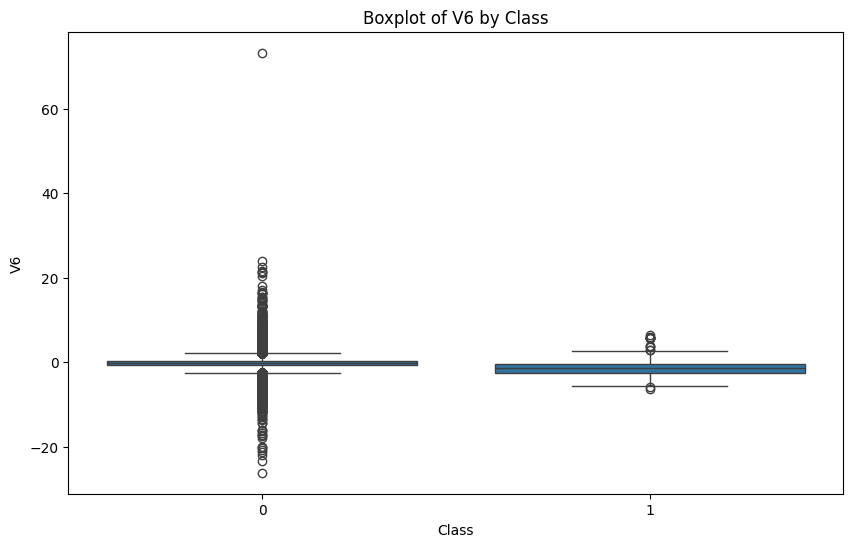

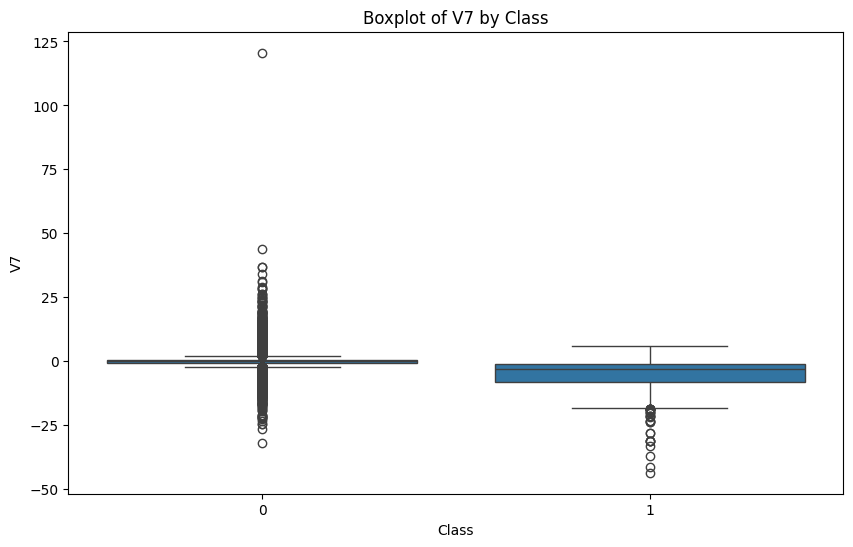

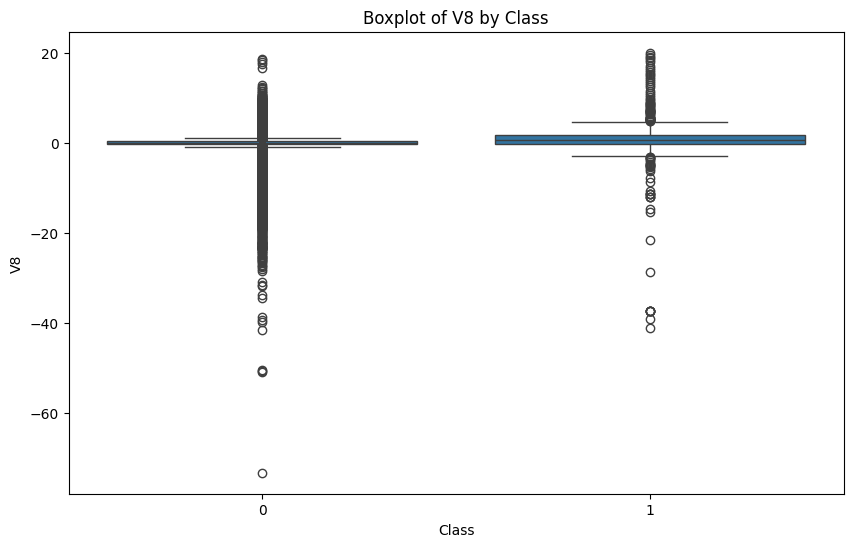

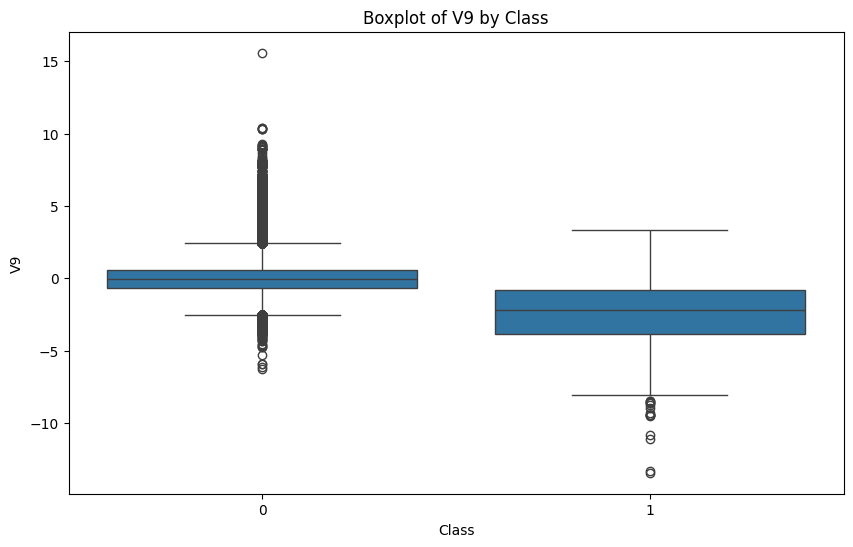

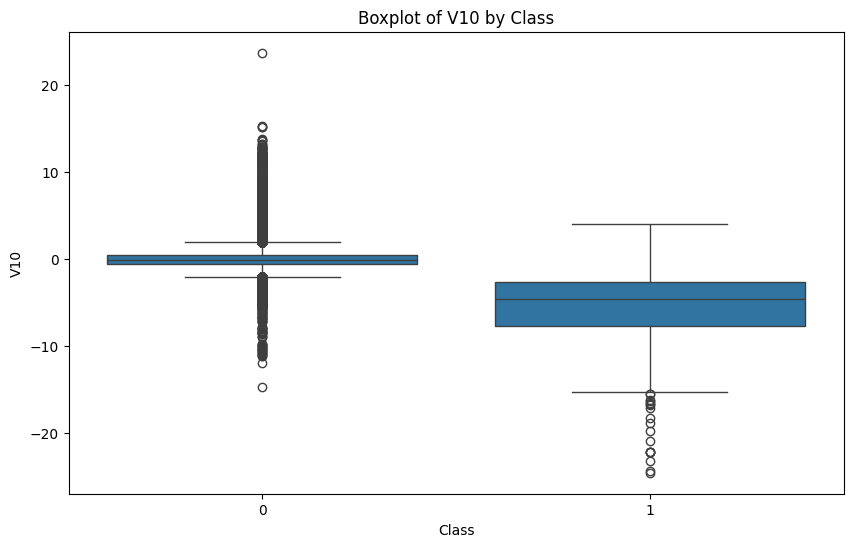

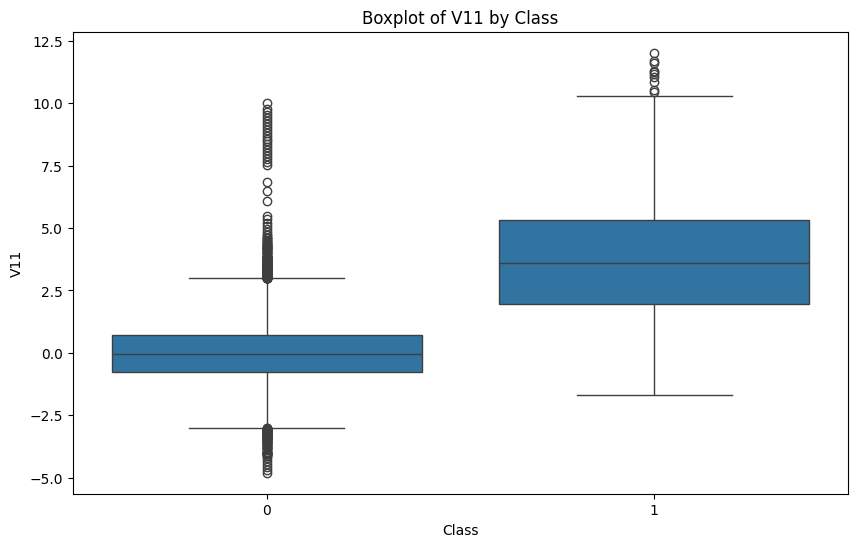

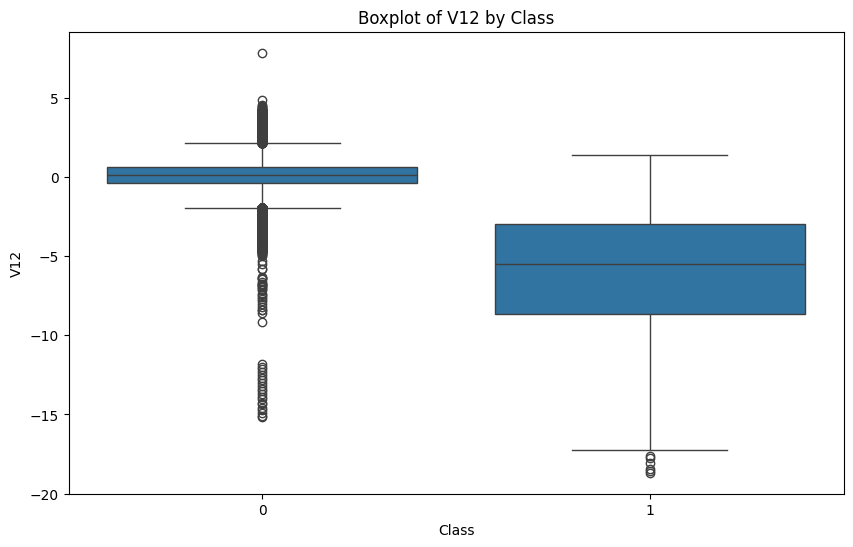

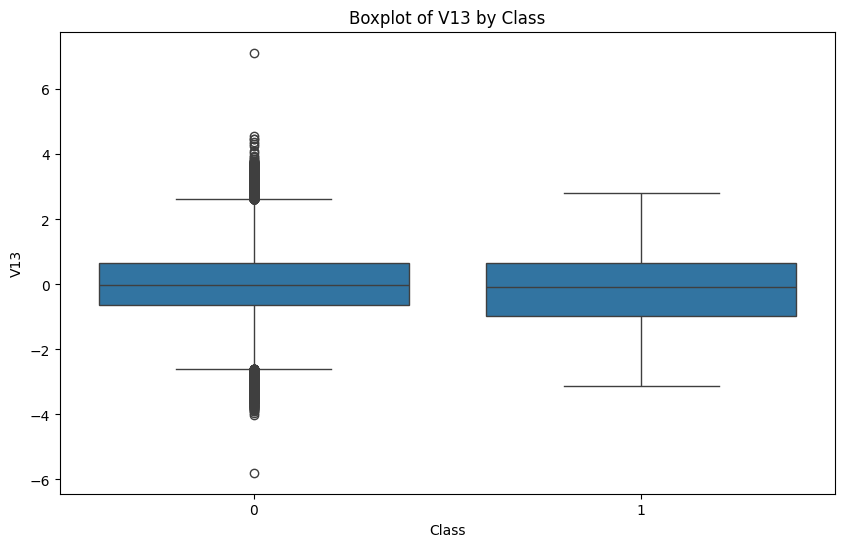

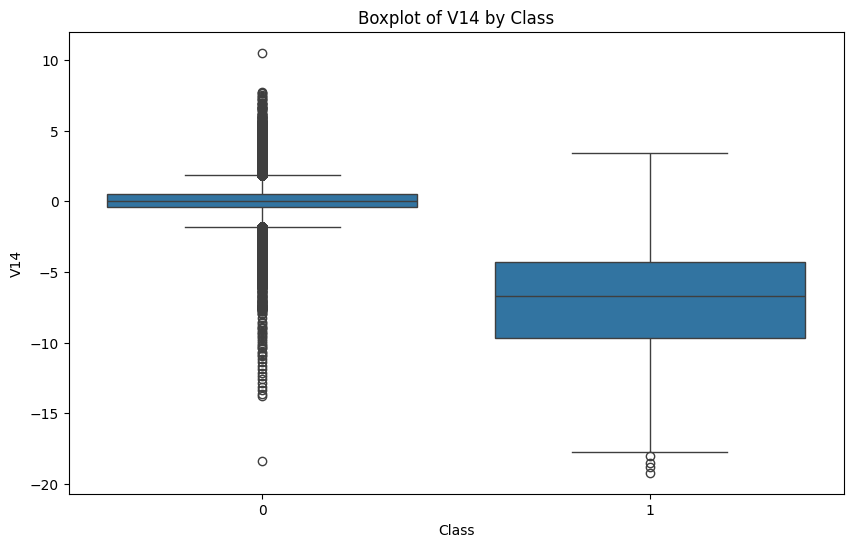

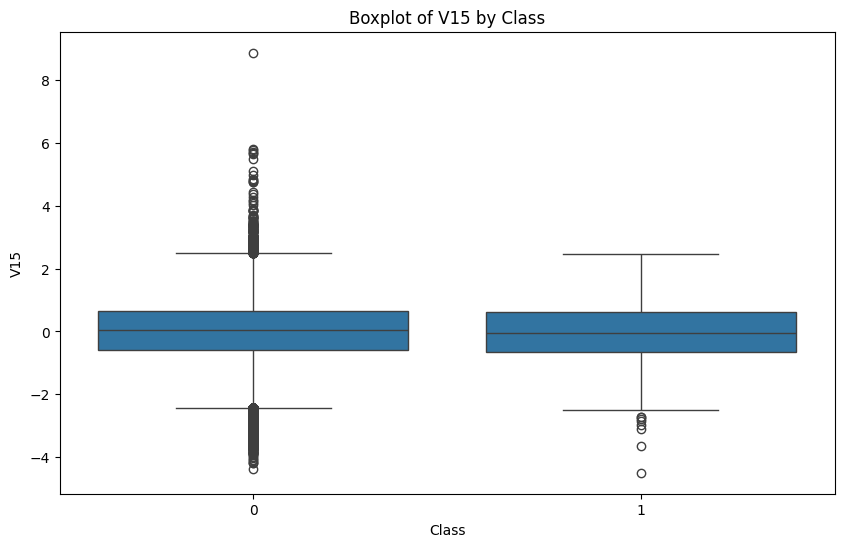

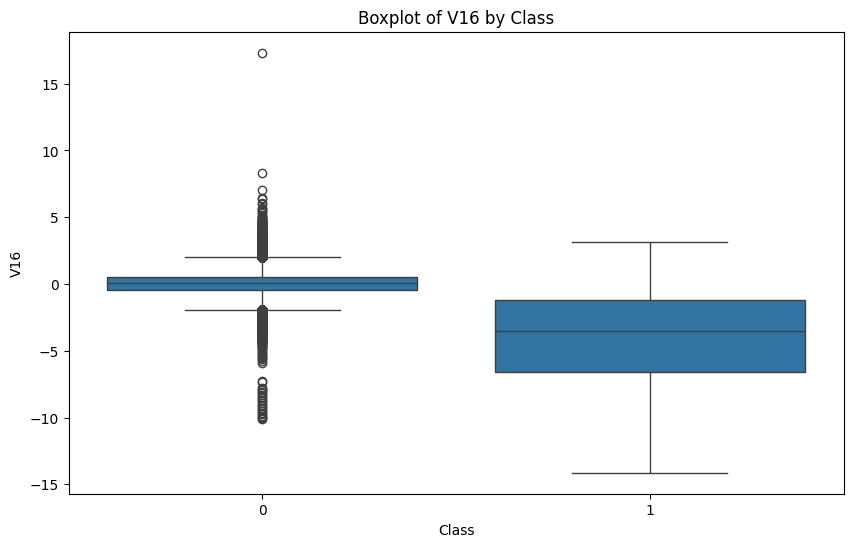

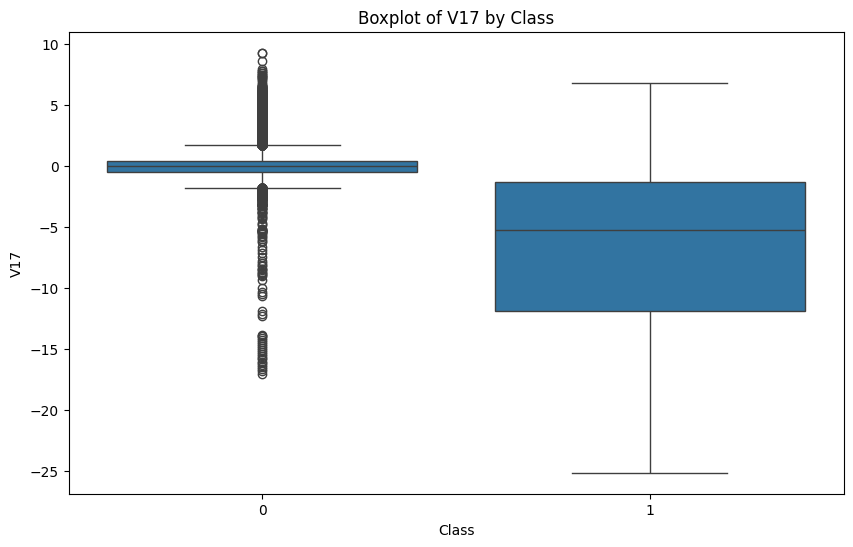

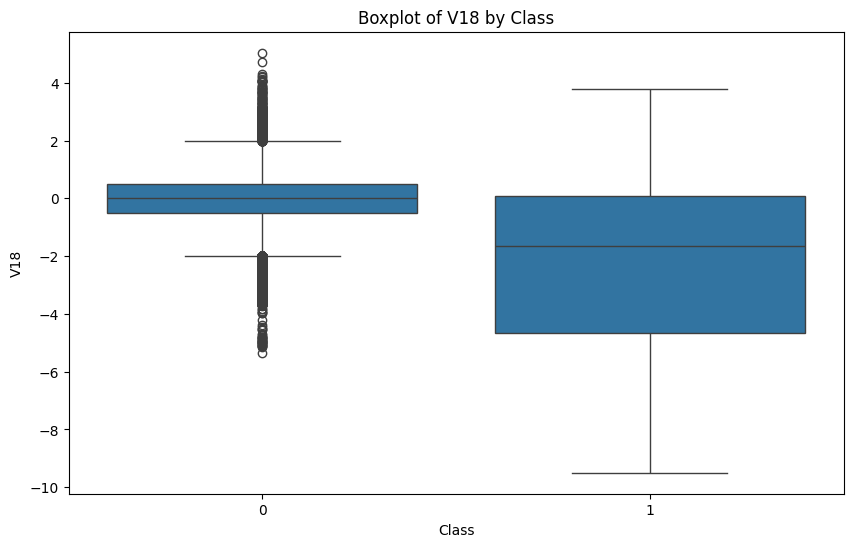

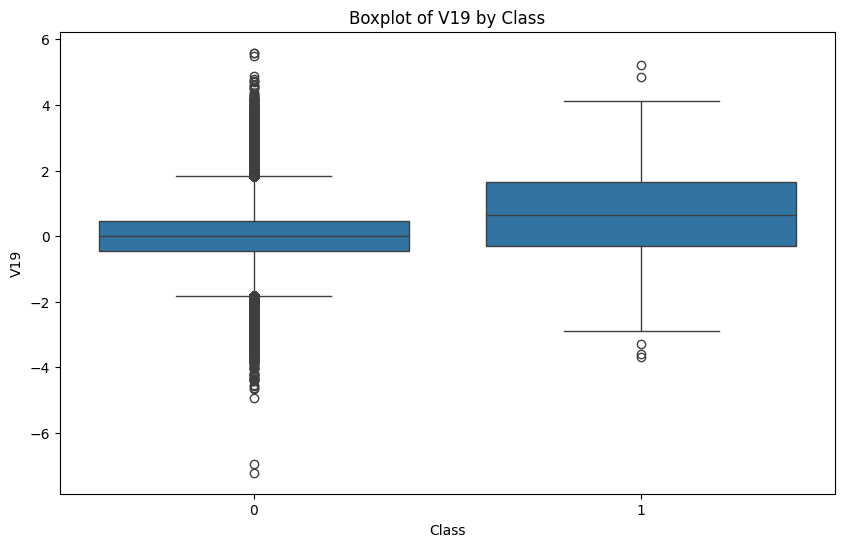

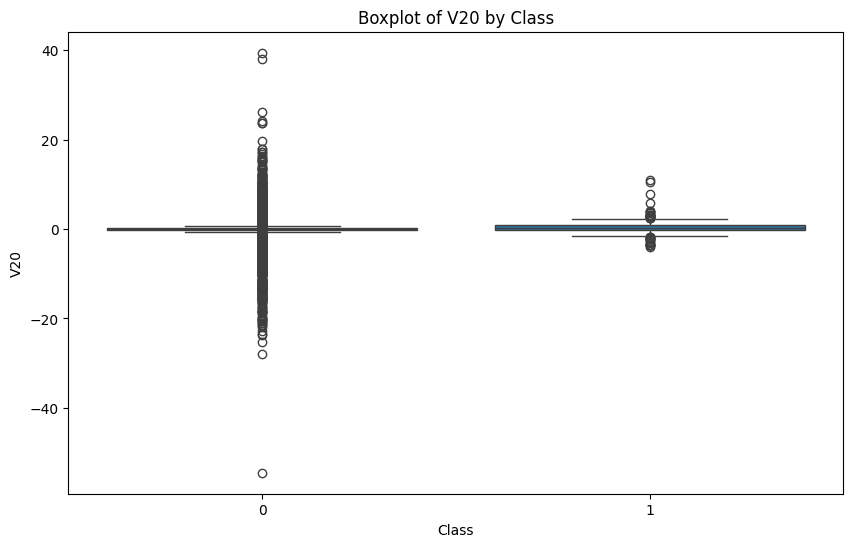

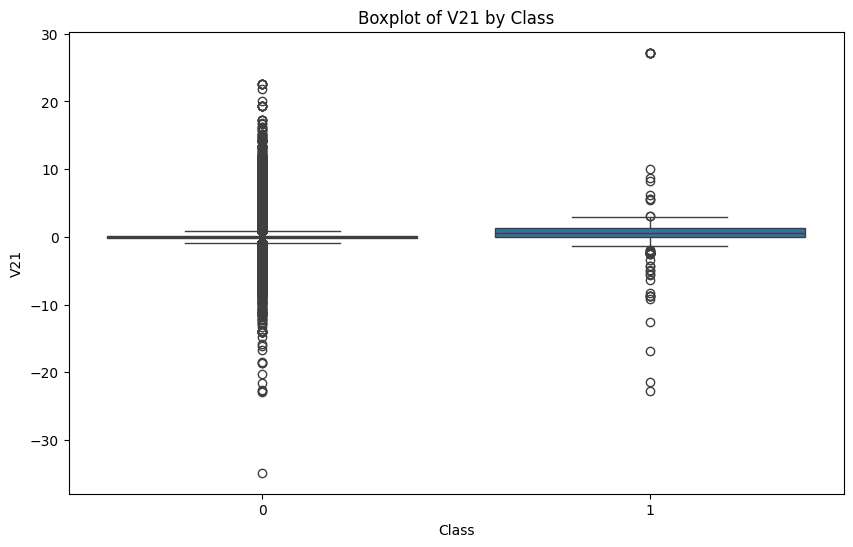

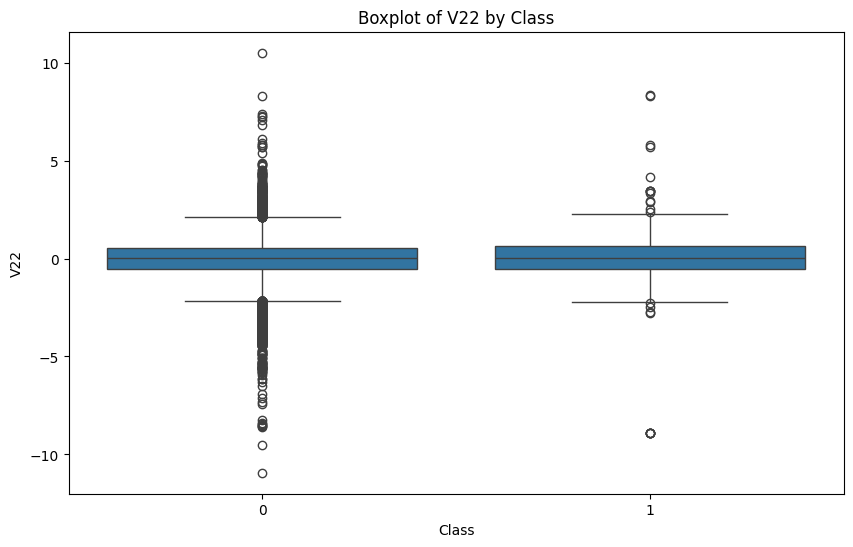

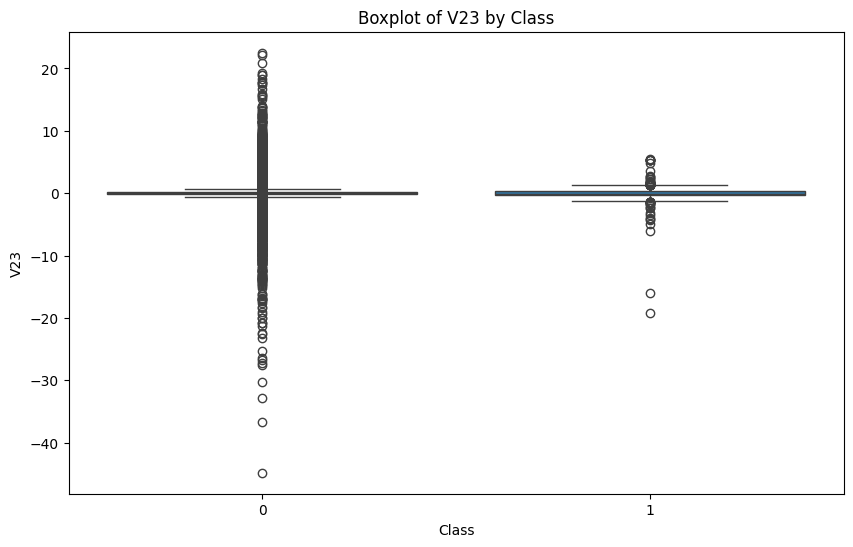

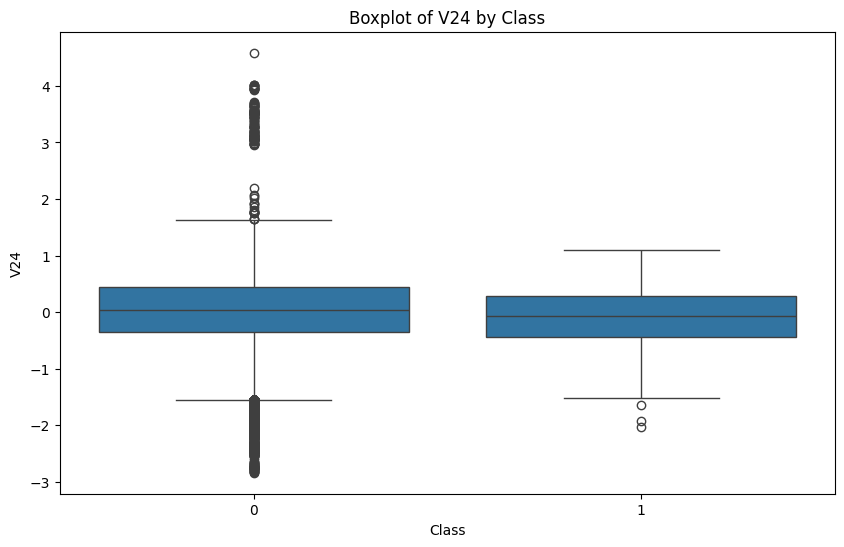

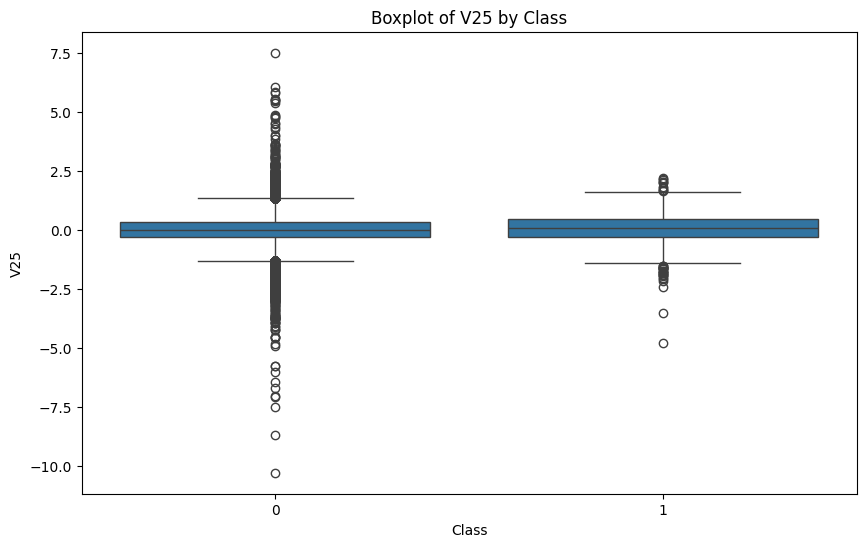

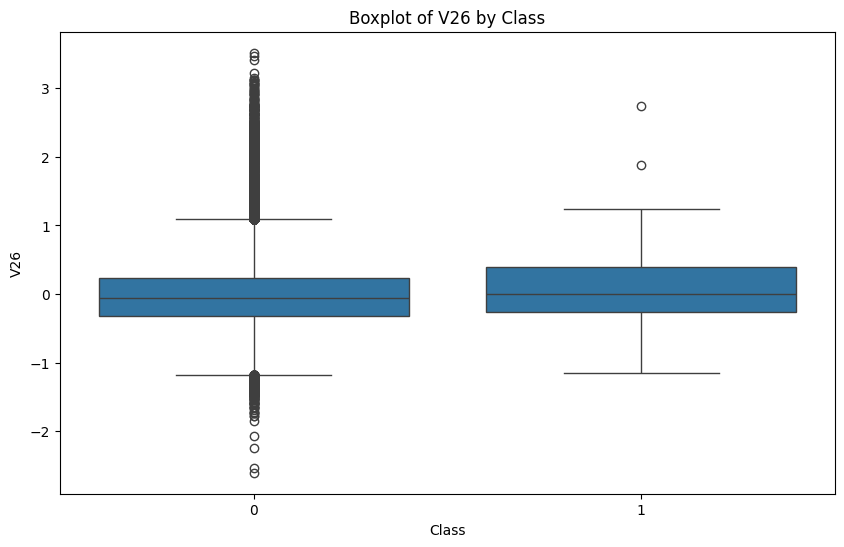

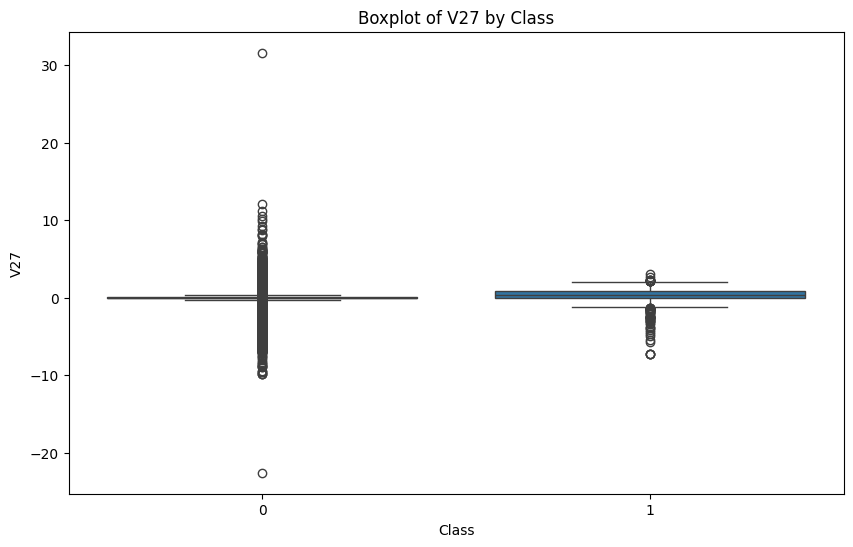

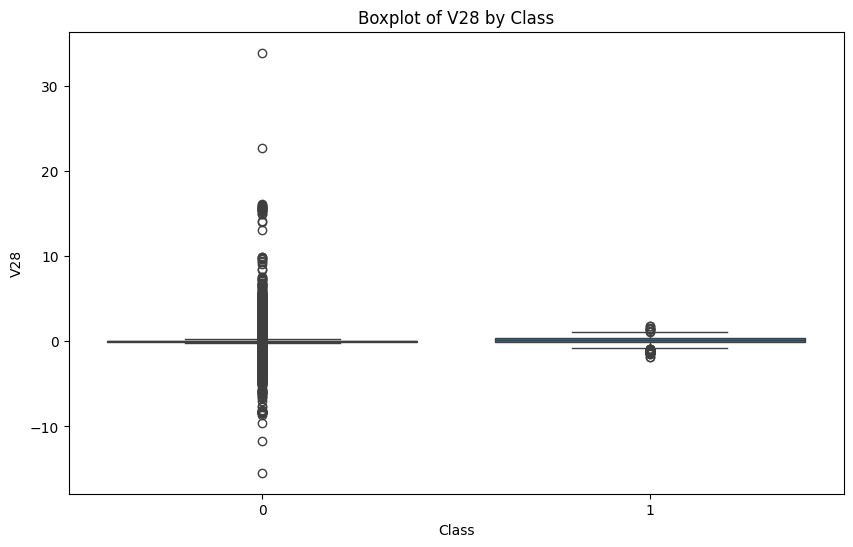

Median differences between classes for V features:
V14: 6.781666613321093
V12: 5.644208288952705
V3: 5.257415070528301
V17: 5.238115339161861
V10: 4.48695268185414
V4: 4.19955224226529
V11: 3.6211416803170557
V16: 3.617171757167275
V7: 3.0755399248993354
V2: 2.6537988387061513
V1: 2.362520732317084
V9: 2.1588043221164694
V18: 1.661559643302737
V5: 1.4695046018076419
V6: 1.151492775743596
V19: 0.6436897978156481
V21: 0.6219672869434325
V8: 0.599467033415043
V27: 0.3936967501015142
V20: 0.3473392259146679
V28: 0.1351449713127724
V15: 0.10552099913297106
V24: 0.1018776580463014
V25: 0.07195451011221105
V23: 0.06198858025001735
V26: 0.0565483363915356
V13: 0.05201964005190501
V22: 0.04169837393374545


In [13]:
import pandas as pd
#Load the dataset
df = pd.read_csv("../data/raw/creditcard.csv")
df.info()
df.describe()
#Check for missing values
df.isnull().sum()
#Check for duplicates
df.duplicated().sum()
#Amount analysis, boxplot for fraud with log scale
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title('Boxplot of Amount by Class (Log Scale)')
plt.show()
#Print the median and mean of the amount for both classes
print("Median Amount for Non-Fraudulent Transactions:", df[df['Class'] == 0]['Amount'].median())
print("Median Amount for Fraudulent Transactions:", df[df['Class'] == 1]['Amount'].median())
print("Mean Amount for Non-Fraudulent Transactions:", df[df['Class'] == 0]['Amount'].mean())
print("Mean Amount for Fraudulent Transactions:", df[df['Class'] == 1]['Amount'].mean())
#Time analysis, converting second to hours and graficly presenting witch class is more common in which time of the day, two overlaping histograms
df['Hour'] = (df['Time'] / 3600) % 24
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Hour'], color='blue', label='Non-Fraudulent', kde=True, stat="density", bins=24)
sns.histplot(df[df['Class'] == 1]['Hour'], color='red', label='Fraudulent', kde=True, stat="density", bins=24)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.legend()
plt.show()
#V1-V28 analysis for every V variable, boxplot for fraud with log scale
v_features = [f'V{i}' for i in range(1, 29)]
for feature in v_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')
    plt.show()
#Processing median for every V variable by class and sorting by the difference between the two classes
median_diff = {}
for feature in v_features:
    median_non_fraud = df[df['Class'] == 0][feature].median()
    median_fraud = df[df['Class'] == 1][feature].median()
    median_diff[feature] = abs(median_non_fraud - median_fraud)
median_diff_sorted = dict(sorted(median_diff.items(), key=lambda item: item[1], reverse=True))
print("Median differences between classes for V features:")
for feature, diff in median_diff_sorted.items():
    print(f"{feature}: {diff}")
